<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [27]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [28]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [29]:
## Write your code here
critical_columns = ['Employment', 'JobSat', 'RemoteWork']
missing_counts = df[critical_columns].isnull().sum()
print("Initial Missing Values in Critical Columns:")
print(missing_counts)

# Strategy for handling missing values:
# 1. Fill missing values in Employment and RemoteWork with the most frequent value (mode)
for col in ['Employment', 'RemoteWork']:
    most_frequent = df[col].mode()[0]  # Get the mode of the column
    df[col].fillna(most_frequent, inplace=True)

# 2. For JobSat, fill missing values with a placeholder like "Not Available"
df['JobSat'].fillna("Not Available", inplace=True)

# Verify the count of missing values after handling
missing_counts_after = df[critical_columns].isnull().sum()
print("\nMissing Values After Handling:")
print(missing_counts_after)

# Display the first few rows of critical columns after imputation
print("\nSample Data After Handling Missing Values:")
print(df[critical_columns].head())


Initial Missing Values in Critical Columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing Values After Handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64

Sample Data After Handling Missing Values:
            Employment         JobSat                            RemoteWork
0  Employed, full-time  Not Available                                Remote
1  Employed, full-time  Not Available                                Remote
2  Employed, full-time  Not Available                                Remote
3   Student, full-time  Not Available  Hybrid (some remote, some in-person)
4   Student, full-time  Not Available  Hybrid (some remote, some in-person)


/tmp/ipykernel_84/2819574228.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)
/tmp/ipykernel_84/2819574228.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
>20 years      8.0
Name: JobSat, dtype: float64


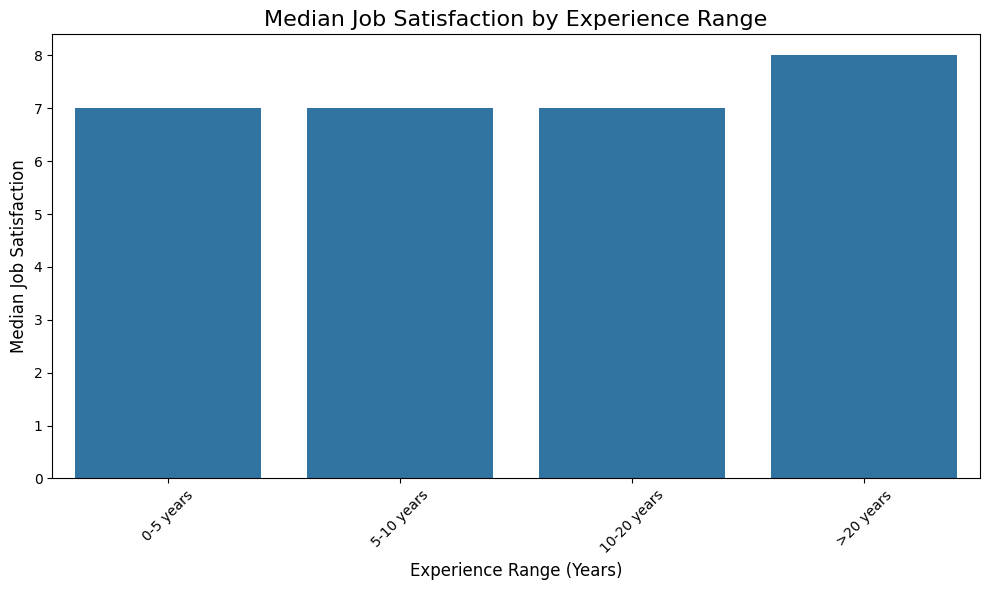

In [32]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'YearsCodePro' to numeric, forcing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Handle missing or invalid values in 'JobSat', convert to numeric and handle errors
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Handle missing or invalid values in 'YearsCodePro' and 'JobSat' (either drop or fill)
df.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

# Define experience ranges for 'YearsCodePro'
bins = [0, 5, 10, 20, float('inf')]  # 0-5, 5-10, 10-20, >20 years
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create a new column 'ExperienceRange' based on the defined bins
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate the median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSat'].median()

# Print the median JobSat for each experience range
print(median_job_sat)

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_job_sat.index, y=median_job_sat.values)

# Customize plot
plt.title('Median Job Satisfaction by Experience Range', fontsize=16)
plt.xlabel('Experience Range (Years)', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit in the plot area
plt.show()



#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


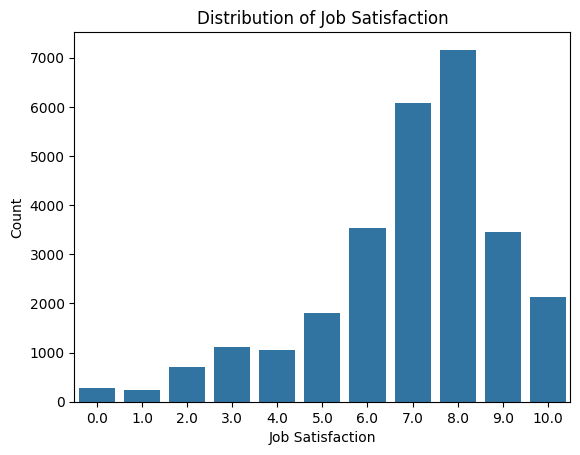

In [33]:
## Write your code her

# Create a count plot to visualize the distribution of JobSat
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


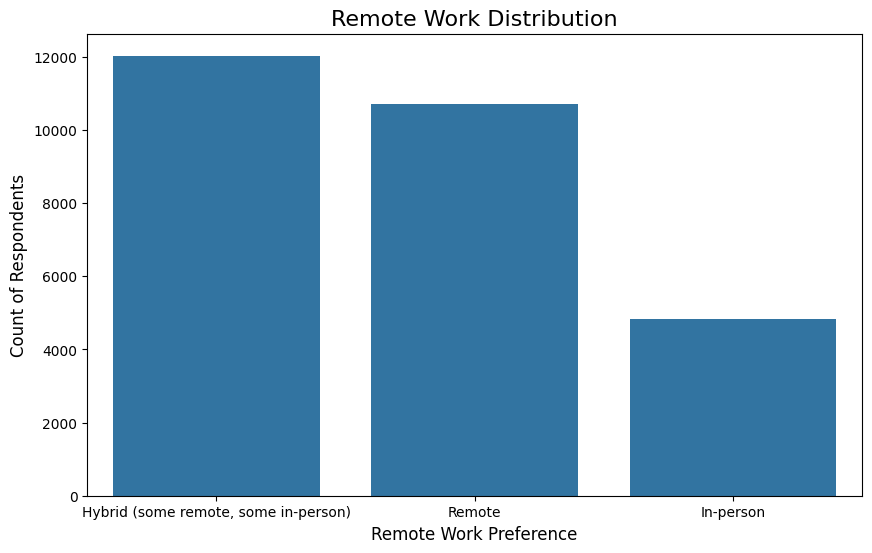

In [35]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df)

# Customize plot appearance
plt.title('Remote Work Distribution', fontsize=16)
plt.xlabel('Remote Work Preference', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)

# Show the plot
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


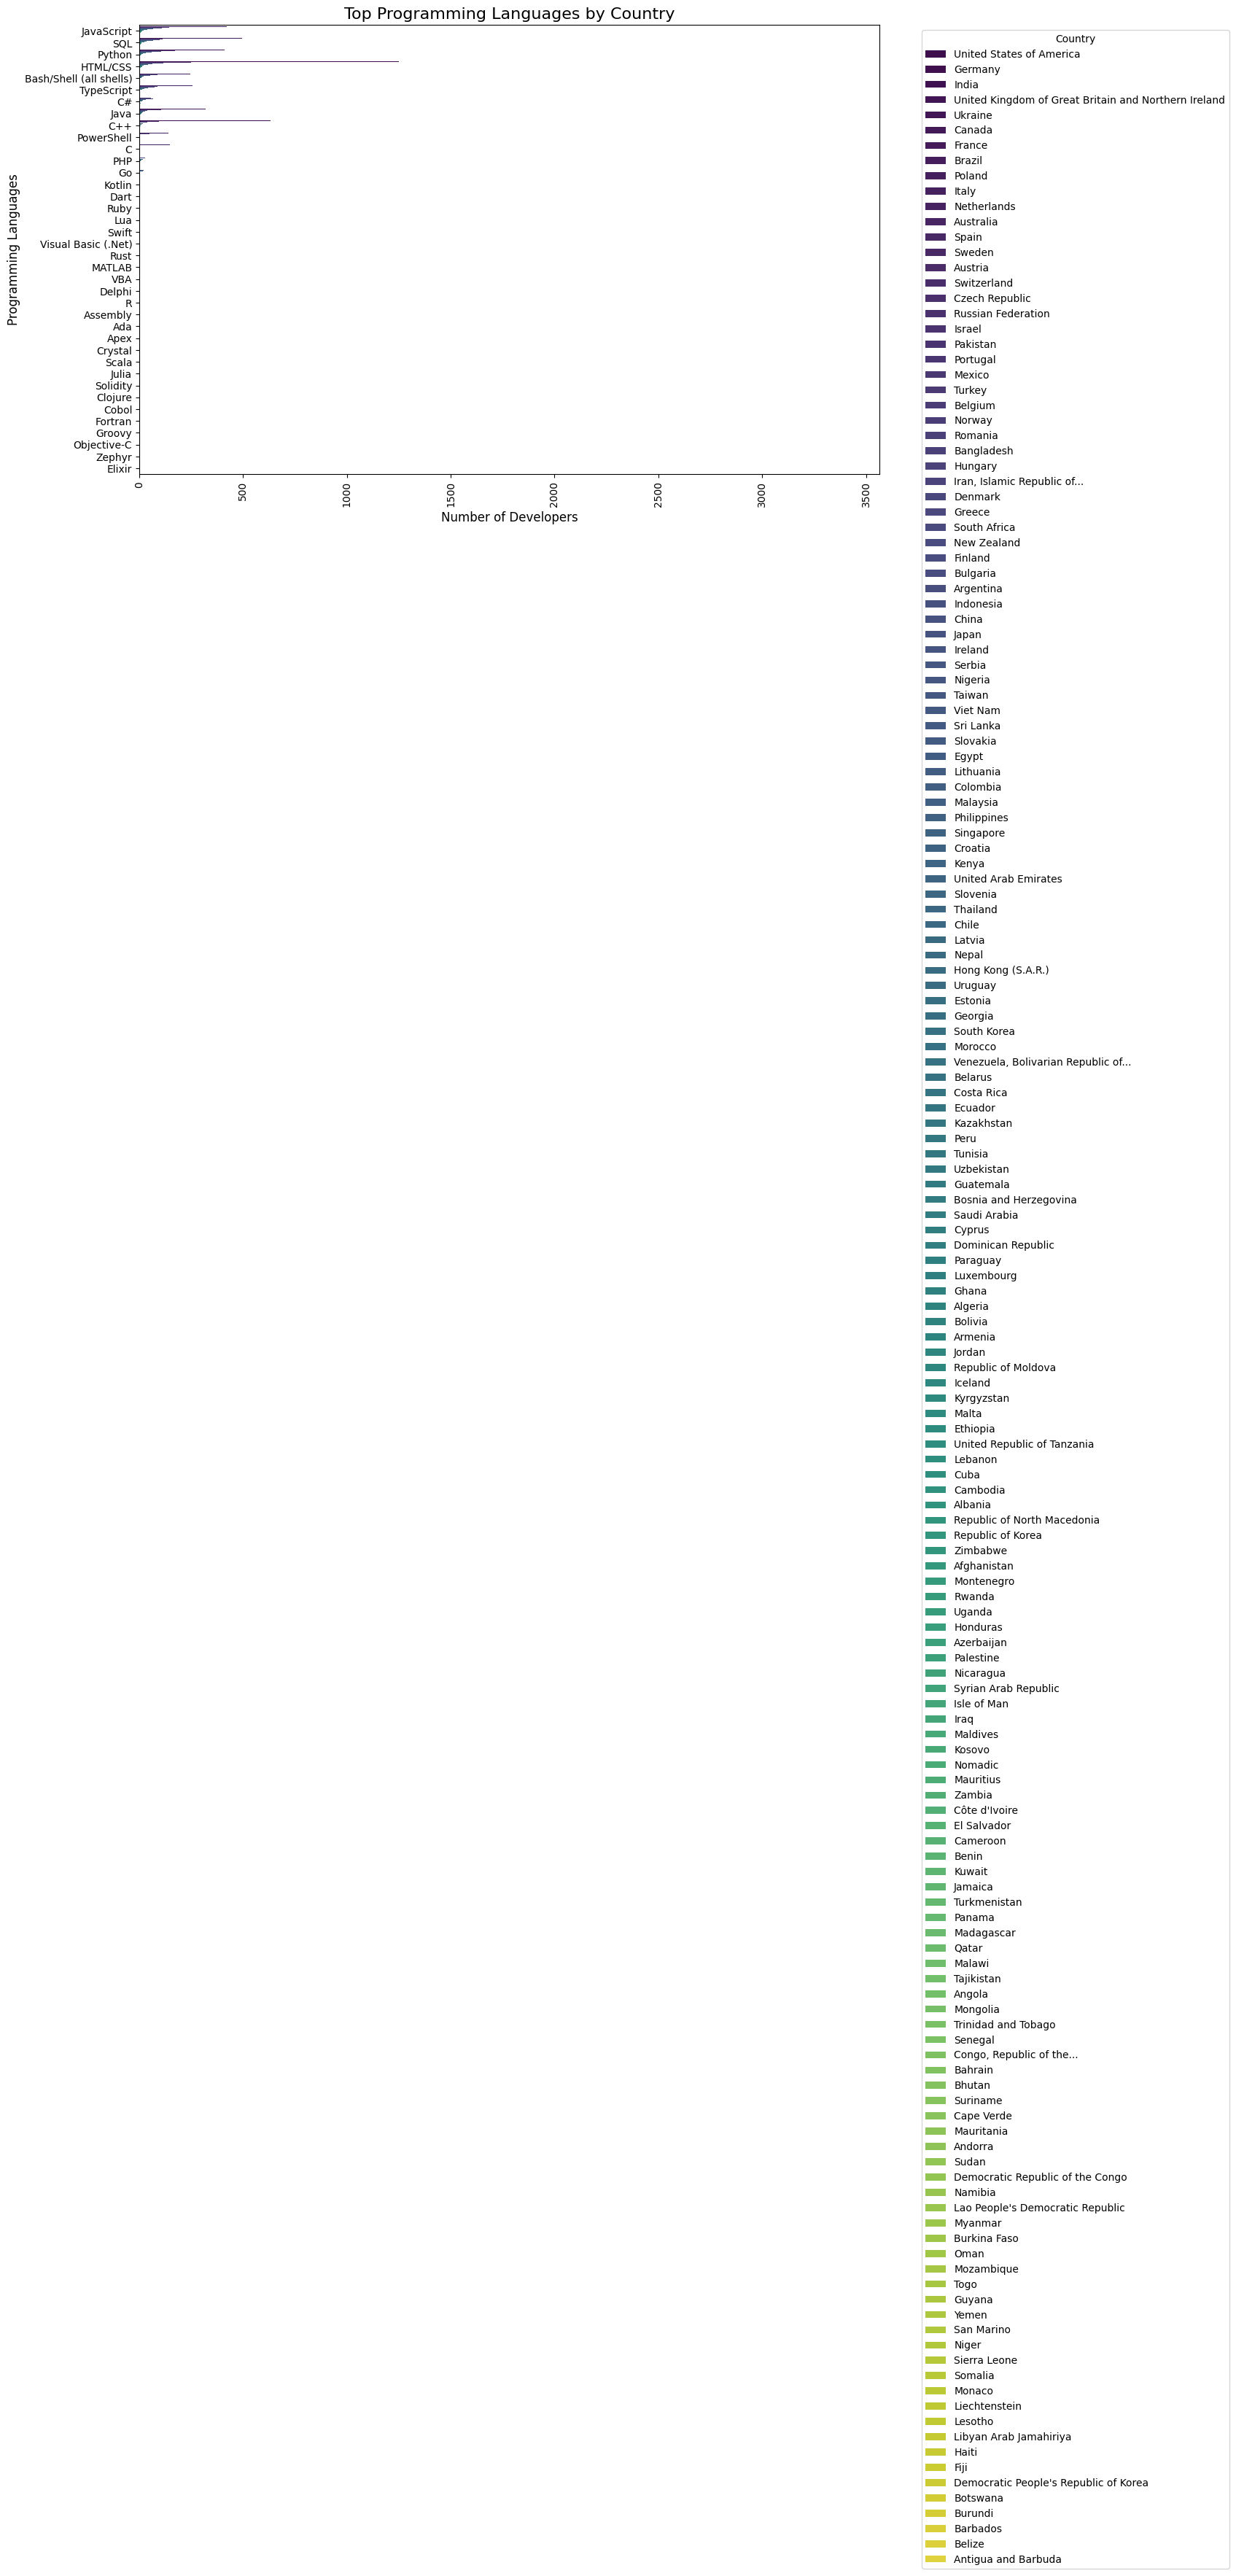

In [36]:
## Write your code here
# Assuming 'df' is your DataFrame and 'LanguageHaveWorkedWith' contains a list of languages
# Step 1: Explode the 'LanguageHaveWorkedWith' column
df_exploded = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_exploded = df_exploded.to_frame('LanguagesList')

# Step 2: Merge the exploded DataFrame with the original DataFrame to keep 'Country'
df_exploded = df_exploded.join(df['Country'])

# Step 3: Count occurrences of each language by country
language_by_country = df_exploded.groupby(['Country', 'LanguagesList']).size().reset_index(name='Count')

# Step 4: Get the top N languages for each country
# Sort by 'Count' and then get the top N languages for each country
language_by_country_sorted = language_by_country.sort_values(by='Count', ascending=False)
top_languages_by_country = language_by_country_sorted.groupby('Country').head(10).reset_index(drop=True)

# Step 5: Plot the bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='LanguagesList', hue='Country', data=top_languages_by_country, palette='viridis')

# Add labels and title
plt.title('Top Programming Languages by Country', fontsize=16)
plt.xlabel('Number of Developers', fontsize=12)
plt.ylabel('Programming Languages', fontsize=12)
plt.xticks(rotation=90)

# Adjust layout to avoid overlap
plt.subplots_adjust(right=0.85)

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


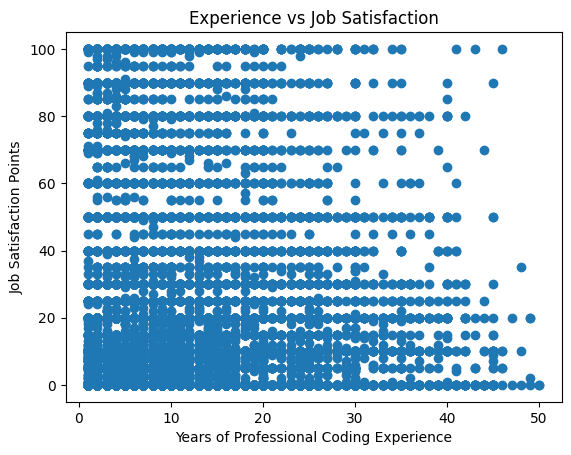

In [37]:
## Write your code here
# Scatter plot to visualize the relationship between experience and job satisfaction
plt.scatter(df['YearsCodePro'], df['JobSatPoints_1'])
plt.title('Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 641   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10040   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6393   
Primary/elementary school                                            84   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1097   
Secondary school (e.g. American high school, Ge...                  817   
Some college/university study without earning a...                 2168   
Something else                                                      196   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

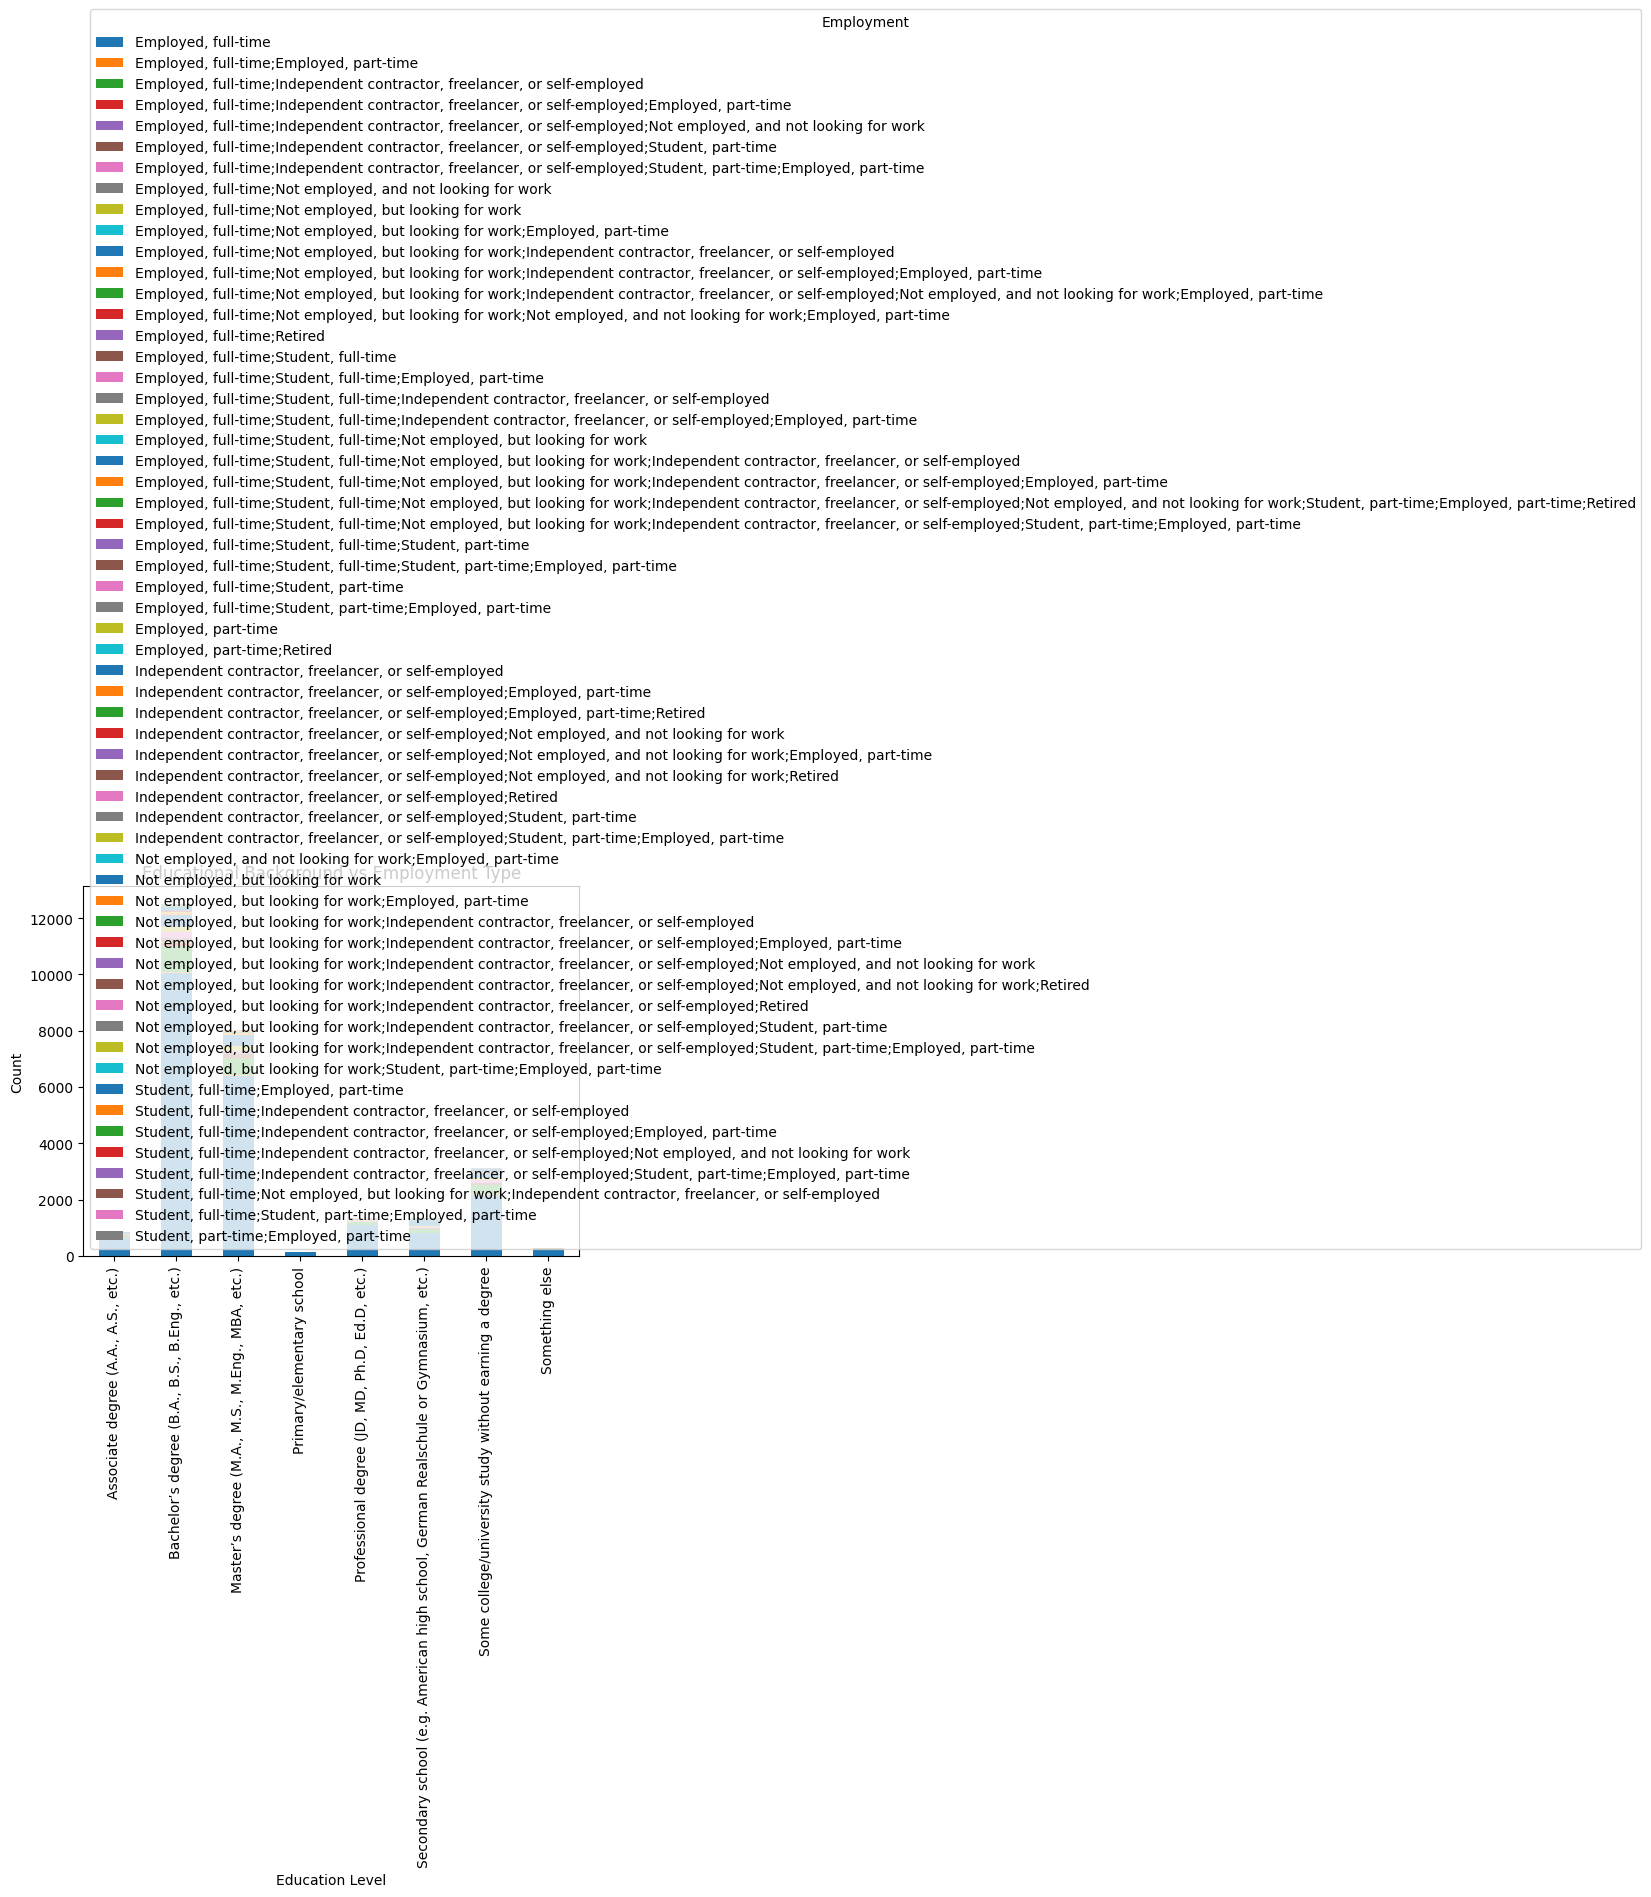

In [38]:
## Write your code here
# Cross-tabulate educational background and employment type
ed_level_employment = pd.crosstab(df['EdLevel'], df['Employment'])
print(ed_level_employment)

# Visualize the relationship using a bar plot
ed_level_employment.plot(kind='bar', stacked=True)
plt.title('Educational Background vs Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()




#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [39]:
## Write your code here
# Save the cleaned and analyzed dataset
df.to_csv('cleaned_analyzed_dataset.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
